In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
data = pd.read_csv('https://raw.githubusercontent.com/mubaris/potential-enigma/master/headbrain.csv')

In [6]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [9]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [10]:
m = len(X)
numer = 0
denom = 0

In [11]:
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += np.square(X[i] - mean_x)

In [13]:
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

In [14]:
b1,b0

(0.26342933948939945, 325.57342104944223)

### Ploting values using matplotlib

In [15]:
max_x = max(X) + 100
min_x = min(X) - 100

In [16]:
x = np.linspace(min_x, max_x, 1000)
y = b0 + (b1*x)

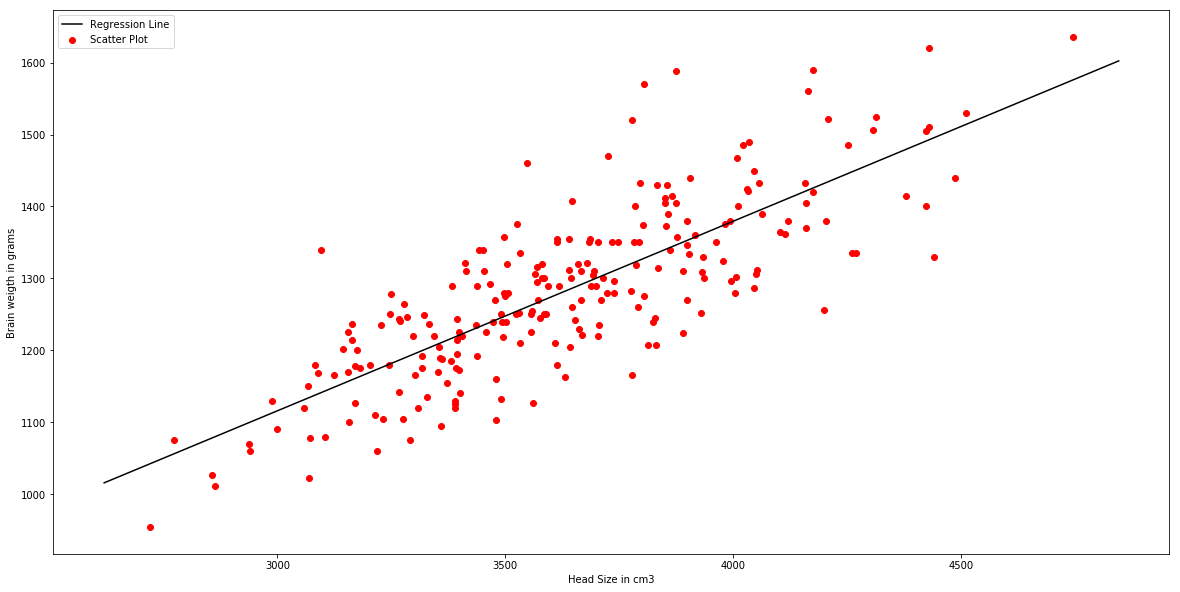

In [19]:
plt.plot(x, y, color='black', label='Regression Line')
plt.scatter(X, Y, c='red', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain weigth in grams')
plt.legend()
plt.show()

Calculating **Root mean squared error** and **Coeffiecient of Determination(R^2 score)**

In [20]:
rmse = 0
for i in range(m):
    y_pred = b0 + b1*X[i]
    rmse += np.square(y_pred - Y[i]) 
rmse = np.sqrt(rmse/m)

In [21]:
rmse

72.120621378370899

In [25]:
ss_t = 0
ss_r = 0

for i in range(m):
    ss_t += np.square(Y[i] - mean_y)
    y_pred = b0 + b1*X[i]
    ss_r += np.square(Y[i] - y_pred)

r_2 = 1 - (ss_r/ss_t)

In [26]:
r_2

0.63931171995700031

## Scikit way

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
X = X.reshape((m, 1))
reg = LinearRegression()

In [33]:
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
Y_pred = reg.predict(X)

In [36]:
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

In [39]:
rmse, r2_score

(72.120621378370899, 0.63931171995699998)